In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
# 数据print精度,显示小数点后三位
pd.set_option('precision',3)
# data 路径
dataPath = "Desktop/winequality-white的副本.csv"
# 读取数据
df = pd.read_csv("Desktop/winequality-white的副本.csv",sep=';')
df.head(5)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0    1.001  3.00       0.45   
1                 14.0                 132.0    0.994  3.30       0.49   
2                 30.0                  97.0    0.995  3.26       0.44   
3                 47.0                 186.0    0.996  3.19       0.40   
4                 47.0                 186.0    0.996  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6  
3      9.9        6  
4      9.9        6

In [8]:
# 查看数据信息
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [9]:
df.describe()# 简单的数据统计

fixed acidity  volatile acidity  citric acid  residual sugar  \
count       4898.000          4898.000     4898.000        4898.000   
mean           6.855             0.278        0.334           6.391   
std            0.844             0.101        0.121           5.072   
min            3.800             0.080        0.000           0.600   
25%            6.300             0.210        0.270           1.700   
50%            6.800             0.260        0.320           5.200   
75%            7.300             0.320        0.390           9.900   
max           14.200             1.100        1.660          65.800   

       chlorides  free sulfur dioxide  total sulfur dioxide   density  \
count   4898.000             4898.000              4898.000  4898.000   
mean       0.046               35.308               138.361     0.994   
std        0.022               17.007                42.498     0.003   
min        0.009                2.000                 9.000     0.987   
25%        0.036               23.000               108.000     0.992   
50%        0.043               34.000               134.000     0.994   
75%        0.050               46.000               167.000     0.996   
max        0.346              289.000               440.000     1.039   

             pH  sulphates   alcohol   quality  
count  4898.000   4898.000  4898.000  4898.000  
mean      3.188      0.490    10.514     5.878  
std       0.151      0.114     1.231     0.886  
min       2.720      0.220     8.000     3.000  
25%       3.090      0.410     9.500     5.000  
50%       3.180      0.470    10.400     6.000  
75%       3.280      0.550    11.400     6.000  
max       3.820      1.080    14.200     9.000


Figure 2: Univariate Histograms


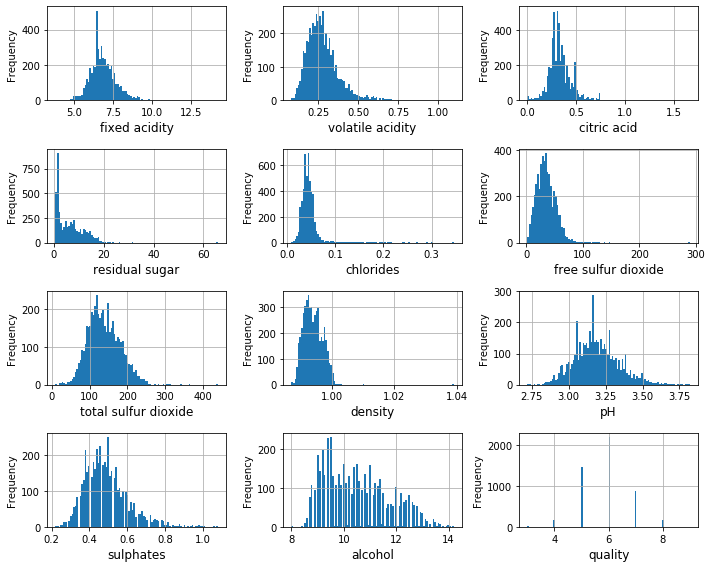

In [12]:
# df.hist
colnm = df.columns.tolist()
plt.figure(figsize=(10,8))
for i in range(12):
    plt.subplot(4,3,i+1)
    df[colnm[i]].hist(bins = 100, color = color[0])#bins指bin(箱子)的个数，即每张图柱子的个数
    plt.xlabel(colnm[i], fontsize=12)#xlabel：x轴标注
    plt.ylabel('Frequency')#频率ylabel:y轴标注
plt.tight_layout()
print('\nFigure 2: Univariate Histograms')

In [ ]:
#品质
##这个数据集的目的是研究红酒品质和理化性质之间的关系。品质的评价范围是0-10，这个数据集中范围是3到8，有82%的红酒品质是5或6。
#酸度相关的特征
##这个数据集有7个酸度相关的特征：fixed acidity, volatile acidity, citric acid, free sulfur dioxide, total sulfur dioxide, sulphates, pH。前6个特征都与红酒的pH的相关。pH是在对数的尺度，下面对前6个特征取对数然后作histogram。


Figure 2: Univariate Histograms


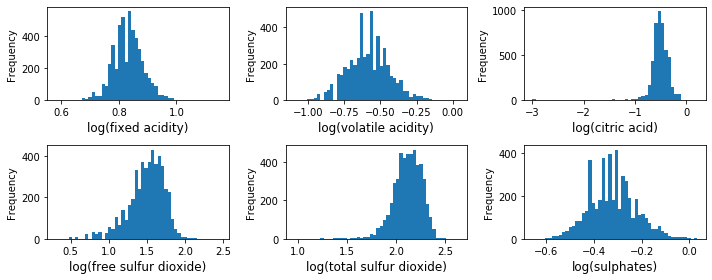

In [14]:
acidityFeat = ['fixed acidity','volatile acidity', 'citric acid','free sulfur dioxide','total sulfur dioxide', 'sulphates']

plt.figure(figsize=(10,4))

for i in range(6):
    ax = plt.subplot(2,3,i+1)
    v = np.log10(np.clip(df[acidityFeat[i]].values, a_min = 0.001, a_max= None))#np.clip()将一个数组元素的值限制在一个范围内
    plt.hist(v, bins=50, color=color[0])#用来画直方图
    plt.xlabel('log(' + acidityFeat[i] + ')', fontsize = 12)#x 轴标注
    
    plt.ylabel('Frequency')#y轴标注
plt.tight_layout()
print('\nFigure 2: Univariate Histograms')

Figure 4


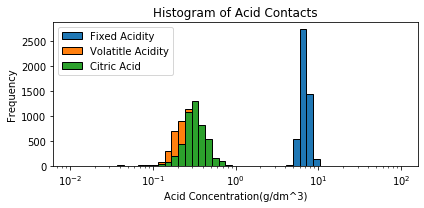

In [15]:
plt.figure(figsize=(6,3))
 # linspace 默认50等分
bins = 10**(np.linspace(-2,2)) 
#bins: 直方图的柱数，可选项，默认为10
plt.hist(df['fixed acidity'], bins=bins, edgecolor = 'k', label='Fixed Acidity') 
#label:字符串或任何可以用'%s'转换打印的内容。
plt.hist(df['volatile acidity'], bins=bins, edgecolor = 'k', label='Volatitle Acidity')
plt.hist(df['citric acid'], bins=bins, edgecolor = 'k', label='Citric Acid')
plt.xscale('log')
plt.xlabel('Acid Concentration(g/dm^3)')
plt.ylabel('Frequency')
#title ：图形标题
plt.title('Histogram of Acid Contacts')
#plt.legend（）函数主要的作用就是给图加上图例
plt.legend()
plt.tight_layout()

print('Figure 4')

Figure 5: Total Acid Histogram


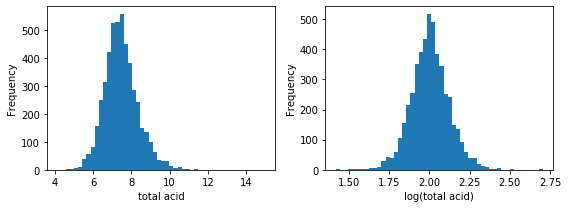

In [16]:
# 总酸度
df['total acid'] = df['fixed acidity'] + df['volatile acidity'] + df['citric acid']

plt.figure(figsize = (8,3))

plt.subplot(121)
plt.hist(df['total acid'], bins = 50, color = color[0])
plt.xlabel('total acid')
plt.ylabel('Frequency')
#plt.subplot(numrows, numcols, fignum)当 numrows * numcols < 10 时，中间的逗号可以省略,因此 plt.subplot(211) 就相当于 plt.subplot(2,1,1)。
plt.subplot(122)
plt.hist(np.log(df['total acid']), bins = 50 , color = color[0])
plt.xlabel('log(total acid)')
plt.ylabel('Frequency')
plt.tight_layout()

print("Figure 5: Total Acid Histogram")

In [17]:
#甜度
##Residual sugar 与酒的甜度相关，通常用来区别各种红酒，干红（<=4 g/L), 半干（4-12 g/L）,半甜（12-45 g/L），和甜（>45 g/L)

Figure 6:Sweetness


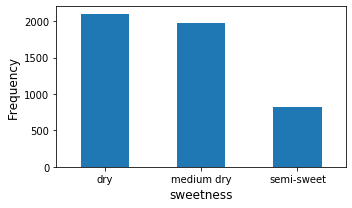

In [18]:
# Residual sugar
df['sweetness']=pd.cut(df['residual sugar'], bins = [0,4,12,45],labels=["dry","medium dry","semi-sweet"])
plt.figure(figsize =(5,3))
df['sweetness'].value_counts().plot(kind = 'bar',color=color[0])
plt.xticks(rotation=0)#rotation代表lable显示的旋转角度。
plt.xlabel('sweetness',fontsize=12)#fontsize文字大小
plt.ylabel('Frequency',fontsize=12)
plt.tight_layout()
print("Figure 6:Sweetness")


Figure 7: Physicochemical Properties and Wine Quality by Boxplot


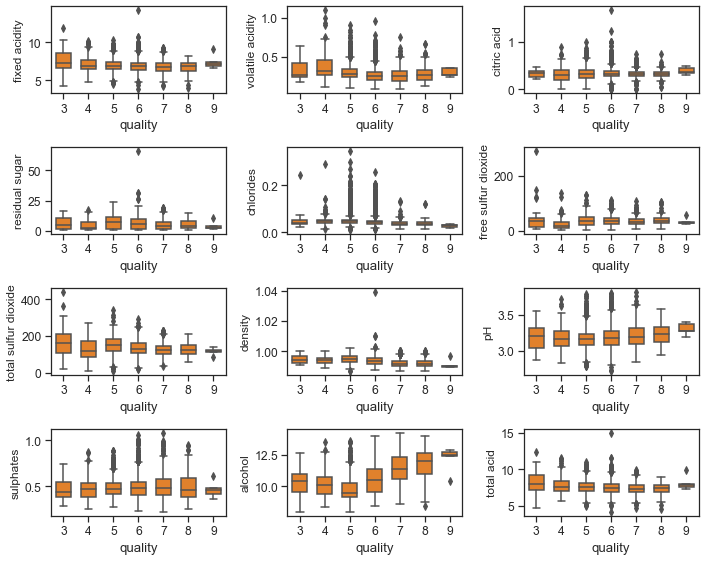

In [19]:
#设置图表主题背景为十字叉
sns.set_style('ticks')
#设置图表样式
sns.set_context("notebook",font_scale=1.1) 

colnm = df.columns.tolist()[:11]+['total acid']
plt.figure(figsize=(10,8))

for i in range(12):
    plt.subplot(4,3,i+1)
    sns.boxplot(x='quality',y=colnm[i],data=df,color=color[1],width=0.6)
    plt.ylabel(colnm[i],fontsize=12)
plt.tight_layout()
print("\nFigure 7: Physicochemical Properties and Wine Quality by Boxplot")

In [ ]:
#红酒品质和理化特征的关系¶ 下面Figure 7和8分别显示了红酒理化特征和品质的关系。其中可以看出的趋势有：
#品质好的酒有更高的柠檬酸，硫酸盐，和酒精度数。硫酸盐(硫酸钙)的加入通常是调整酒的酸度的。其中酒精度数和品质的相关性最高。
#品质好的酒有较低的挥发性酸类，密度，和pH。
#残留糖分，氯离子，二氧化硫似乎对酒的品质影响不大。


Figure 8:Pairwise Correlation Plot


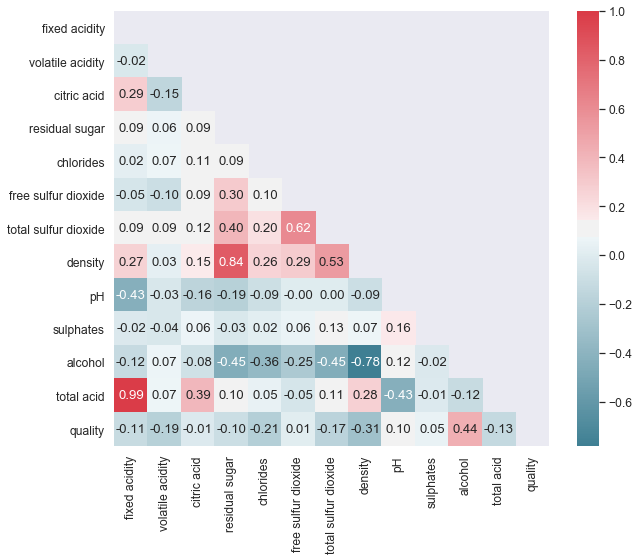

In [20]:
sns.set_style("dark")
plt.figure(figsize=(10,8))
colnm = df.columns.tolist()[:11]+['total acid','quality']
#相关系数矩阵，即给出了任意两个变量之间的相关系数
mcorr = df[colnm].corr()
# 创建一个mcorr一样的全False矩阵
mask = np.zeros_like(mcorr,dtype=np.bool) 
 # 上三角置位True
mask[np.triu_indices_from(mask)]=True 
# 建立一个发散调色板
cmap = sns.diverging_palette(220,10,as_cmap=True)
g=sns.heatmap(mcorr,mask=mask, cmap=cmap, square=True,annot=True, fmt='0.2f')
print("\nFigure 8:Pairwise Correlation Plot")

In [21]:
#相关系数矩阵，即给出了任意两个变量之间的相关系数
mcorr

fixed acidity  volatile acidity  citric acid  \
fixed acidity                 1.000            -0.023        0.289   
volatile acidity             -0.023             1.000       -0.149   
citric acid                   0.289            -0.149        1.000   
residual sugar                0.089             0.064        0.094   
chlorides                     0.023             0.071        0.114   
free sulfur dioxide          -0.049            -0.097        0.094   
total sulfur dioxide          0.091             0.089        0.121   
density                       0.265             0.027        0.150   
pH                           -0.426            -0.032       -0.164   
sulphates                    -0.017            -0.036        0.062   
alcohol                      -0.121             0.068       -0.076   
total acid                    0.987             0.072        0.394   
quality                      -0.114            -0.195       -0.009   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity                  0.089      0.023           -4.940e-02   
volatile acidity               0.064      0.071           -9.701e-02   
citric acid                    0.094      0.114            9.408e-02   
residual sugar                 1.000      0.089            2.991e-01   
chlorides                      0.089      1.000            1.014e-01   
free sulfur dioxide            0.299      0.101            1.000e+00   
total sulfur dioxide           0.401      0.199            6.155e-01   
density                        0.839      0.257            2.942e-01   
pH                            -0.194     -0.090           -6.178e-04   
sulphates                     -0.027      0.017            5.922e-02   
alcohol                       -0.451     -0.360           -2.501e-01   
total acid                     0.105      0.046           -4.513e-02   
quality                       -0.098     -0.210            8.158e-03   

                      total sulfur dioxide  density         pH  sulphates  \
fixed acidity                        0.091    0.265 -4.259e-01     -0.017   
volatile acidity                     0.089    0.027 -3.192e-02     -0.036   
citric acid                          0.121    0.150 -1.637e-01      0.062   
residual sugar                       0.401    0.839 -1.941e-01     -0.027   
chlorides                            0.199    0.257 -9.044e-02      0.017   
free sulfur dioxide                  0.616    0.294 -6.178e-04      0.059   
total sulfur dioxide                 1.000    0.530  2.321e-03      0.135   
density                              0.530    1.000 -9.359e-02      0.074   
pH                                   0.002   -0.094  1.000e+00      0.156   
sulphates                            0.135    0.074  1.560e-01      1.000   
alcohol                             -0.449   -0.780  1.214e-01     -0.017   
total acid                           0.113    0.276 -4.307e-01     -0.012   
quality                             -0.175   -0.307  9.943e-02      0.054   

                      alcohol  total acid  quality  
fixed acidity          -0.121       0.987   -0.114  
volatile acidity        0.068       0.072   -0.195  
citric acid            -0.076       0.394   -0.009  
residual sugar         -0.451       0.105   -0.098  
chlorides              -0.360       0.046   -0.210  
free sulfur dioxide    -0.250      -0.045    0.008  
total sulfur dioxide   -0.449       0.113   -0.175  
density                -0.780       0.276   -0.307  
pH                      0.121      -0.431    0.099  
sulphates              -0.017      -0.012    0.054  
alcohol                 1.000      -0.118    0.436  
total acid             -0.118       1.000   -0.131  
quality                 0.436      -0.131    1.000

In [ ]:
#由上图可知密度和酒精浓度是相关性高

Figure 9: Density vs Alcohol


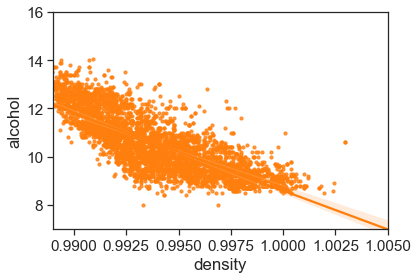

In [22]:
# style
sns.set_style('ticks')
sns.set_context("notebook", font_scale=1.4)
# plot figure
plt.figure(figsize=(6,4))#画出双变量的散点图，然后以y~x拟合回归方程和预测值95%置信区间并将其画出。
sns.regplot(x='density',y='alcohol',data=df, scatter_kws={'s':10},color=color[1])
plt.xlim(0.989,1.005)
plt.ylim(7,16)
print("Figure 9: Density vs Alcohol")

Figure 10: pH vs acid


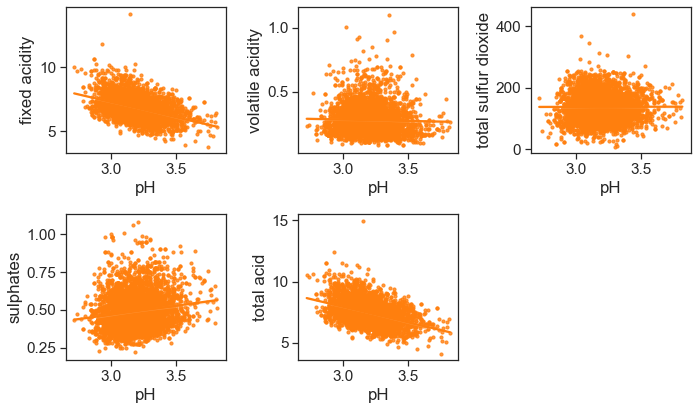

In [23]:
#酸性物质含量和ph值
acidity_related = ['fixed acidity', 'volatile acidity', 'total sulfur dioxide', 
                   'sulphates', 'total acid']

plt.figure(figsize = (10,6))

for i in range(5):
    plt.subplot(2,3,i+1)
    sns.regplot(x='pH', y = acidity_related[i], data = df, scatter_kws = {'s':10}, color = color[1])
plt.tight_layout()
print("Figure 10: pH vs acid")

/opt/anaconda3/lib/python3.7/site-packages/seaborn/regression.py:574: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Figure 11-1: Scatter Plots of Alcohol, Volatile Acid and Quality


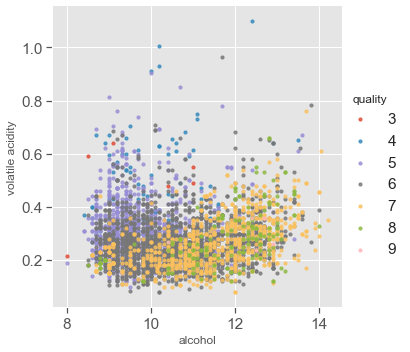

In [24]:
#与品质相关性最高的三个特征是酒精浓度，挥发性酸度，和柠檬酸
##酒精浓度，挥发性酸和品质的关系
plt.style.use('ggplot')
sns.lmplot(x='alcohol',y='volatile acidity', hue='quality',data= df, fit_reg= False, scatter_kws={'s':10}, size=5)
print("Figure 11-1: Scatter Plots of Alcohol, Volatile Acid and Quality")

Figure 11-2: Scatter Plots of Alcohol, Volatile Acid and Quality


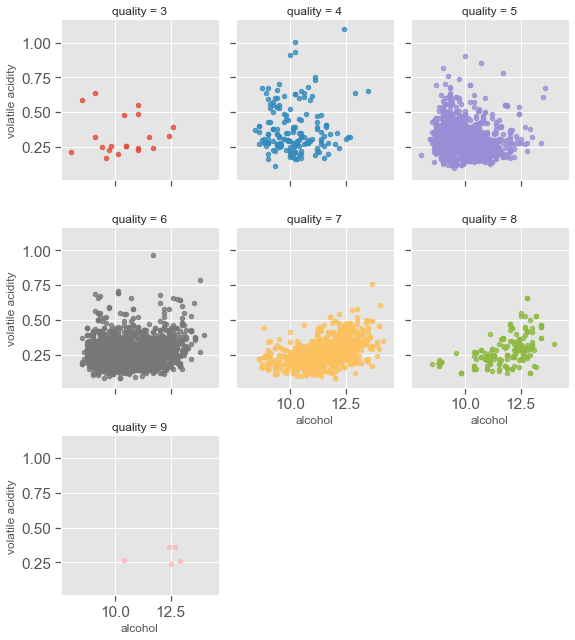

In [25]:
sns.lmplot(x = 'alcohol', y = 'volatile acidity', col='quality', hue = 'quality', data = df,fit_reg = False, size = 3,  aspect= 0.9, col_wrap=3,scatter_kws={'s':20})

print("Figure 11-2: Scatter Plots of Alcohol, Volatile Acid and Quality")


Figure 12: pH with Fixed Acidity and Citric Acid


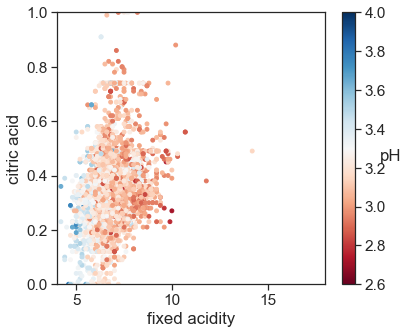

In [26]:
#pH,非挥发性酸和柠檬酸
## style
sns.set_style('ticks')
sns.set_context("notebook", font_scale= 1.4)

plt.figure(figsize=(6,5))
cm = plt.cm.get_cmap('RdBu')
sc = plt.scatter(df['fixed acidity'], df['citric acid'], c=df['pH'], vmin=2.6, vmax=4, s=15, cmap=cm)
bar = plt.colorbar(sc)
bar.set_label('pH', rotation = 0)
plt.xlabel('fixed acidity')
plt.ylabel('citric acid')
plt.xlim(4,18)
plt.ylim(0,1)
print('Figure 12: pH with Fixed Acidity and Citric Acid')

In [ ]:
pH和非挥发性的酸以及柠檬酸有相关性。即浓度越高，pH越低

In [ ]:
#总结：
##整体而言，红酒的品质主要与酒精浓度，挥发性酸，和柠檬酸有关。对于品质优于7，或者劣于4的酒，直观上是线性可分的。但是品质为5，6的酒很难线性区分。